<a href="https://colab.research.google.com/github/CharlBrill89/NYC_AirBnB_Data_2019_Kaggle-/blob/master/NYC_Airbnb_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploration of Airbnb prices in NYC

![alt text](https://www.nyctourist.com/images/maps/nyc-boroughs-map.jpg)

#Admin for the workbook

In [ ]:
pip install geopandas

In [ ]:
#Install required libraries
#pip install geopandas

# Common imports
import numpy as np
import os
import pandas as pd
import geopandas

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    try:
        plt.savefig(path, format=fig_extension, dpi=resolution)
    except:
        plt.savefig(fig_id + "." + fig_extension, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
pd.options.display.max_columns = None

#1. Obtain Data

In [5]:
#Import data from my Github repository

from pathlib import Path

github_p = "https://raw.githubusercontent.com/CharlBrill89/NYC_AirBnB_Data_2019_Kaggle-/master/AB_NYC_2019.csv"

df_bookings = pd.read_csv(github_p)

In [9]:
df_bookings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [10]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [11]:
df_bookings.shape

(48895, 16)

In [12]:
# Summarize our dataset 
print ("Rows     : " ,df_bookings.shape[0])
print ("Columns  : " ,df_bookings.shape[1])
print ("\nFeatures : \n" ,df_bookings.columns.tolist())
print ("\nMissing values :  ", df_bookings.isnull().sum().values.sum())
print ("\nUnique values :  \n",df_bookings.nunique())

Rows     :  48895
Columns  :  16

Features : 
 ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

Missing values :   20141

Unique values :  
 id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

In [13]:
#Which fields have missing items 
df_bookings.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [14]:
df_bookings.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Investigate columns

In [ ]:
df_bookings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


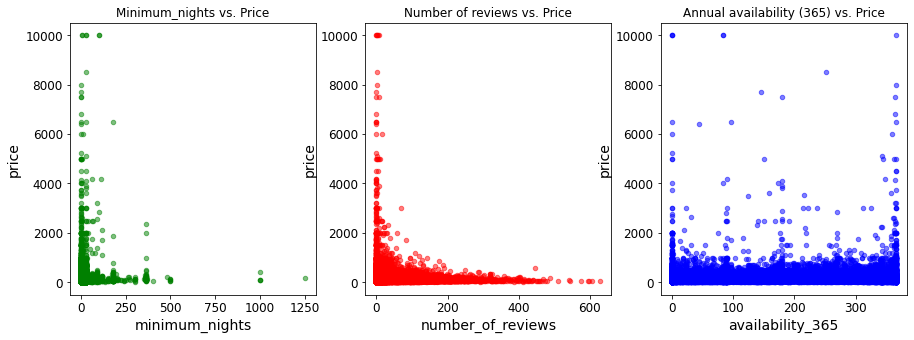

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
df_bookings.plot(kind='scatter', x='minimum_nights', y='price', alpha=0.5, color='green', ax=axes[0], title="Minimum_nights vs. Price")
df_bookings.plot(kind='scatter', x='number_of_reviews', y='price', alpha=0.5, color='red', ax=axes[1], title="Number of reviews vs. Price")
df_bookings.plot(kind='scatter', x='availability_365', y='price', alpha=0.5, color='blue', ax=axes[2], title="Annual availability (365) vs. Price")
plt.show()

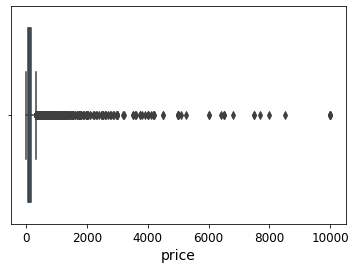

In [16]:
sns.boxplot( x=df_bookings["price"] )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5379e1a198>,
      dtype=object)

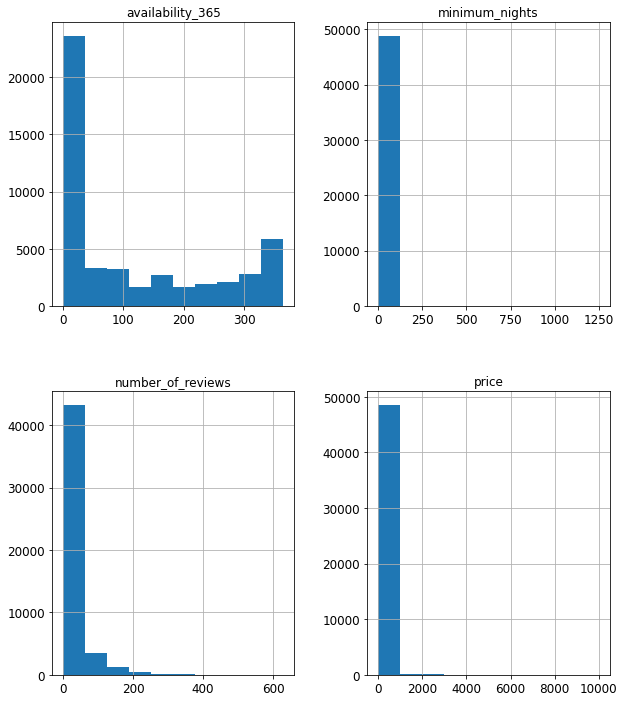

In [17]:
# Plot some of the distributions of the data
columns =['name', 'neighbourhood_group', 'neighbourhood', 'room_type', 'minimum_nights', 'number_of_reviews','price','availability_365'] 
df_bookings[columns].hist(figsize=(10,12))

In [18]:
#The data seems quite skewed - investigate skewness and kurtosis
print(df_bookings["price"].skew())
print(df_bookings["price"].kurtosis())

19.118938995046033
585.6728788988286


### Explore correlations and distributions

In [19]:
# Create our Corelation Matrix
corr = df_bookings.corr()
corr

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.588290,-0.003125,0.090908,0.010619,-0.013224,-0.319760,0.291828,0.133272,0.085468
host_id,0.588290,1.000000,0.020224,0.127055,0.015309,-0.017364,-0.140106,0.296417,0.154950,0.203492
latitude,-0.003125,0.020224,1.000000,0.084788,0.033939,0.024869,-0.015389,-0.010142,0.019517,-0.010983
longitude,0.090908,0.127055,0.084788,1.000000,-0.150019,-0.062747,0.059094,0.145948,-0.114713,0.082731
price,0.010619,0.015309,0.033939,-0.150019,1.000000,0.042799,-0.047954,-0.030608,0.057472,0.081829
minimum_nights,-0.013224,-0.017364,0.024869,-0.062747,0.042799,1.000000,-0.080116,-0.121702,0.127960,0.144303
number_of_reviews,-0.319760,-0.140106,-0.015389,0.059094,-0.047954,-0.080116,1.000000,0.549868,-0.072376,0.172028
reviews_per_month,0.291828,0.296417,-0.010142,0.145948,-0.030608,-0.121702,0.549868,1.000000,-0.009421,0.185791
calculated_host_listings_count,0.133272,0.154950,0.019517,-0.114713,0.057472,0.127960,-0.072376,-0.009421,1.000000,0.225701
availability_365,0.085468,0.203492,-0.010983,0.082731,0.081829,0.144303,0.172028,0.185791,0.225701,1.000000


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

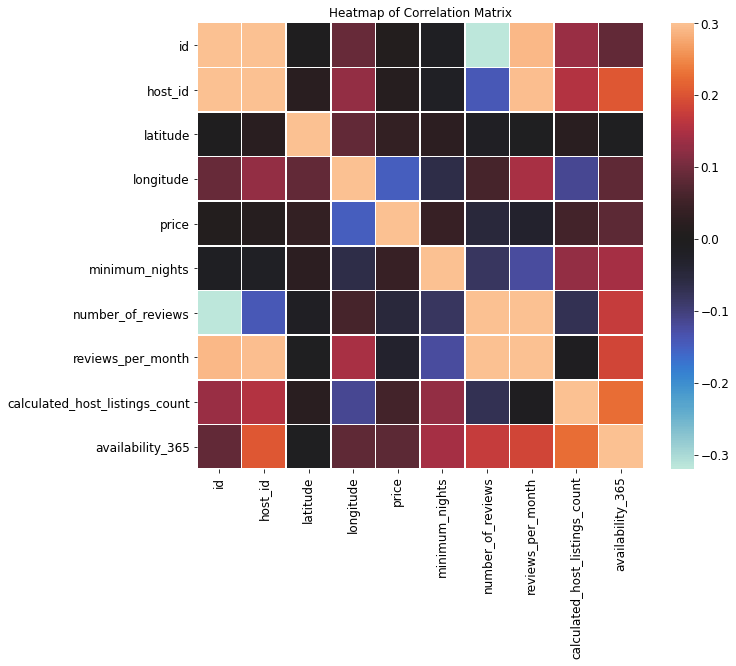

In [20]:
# Generate our corelation plot or heatmap
plt.figure(figsize = (10,10))
#cmap = sns.diverging_palette(220,10,as_cmap = True)

sns.heatmap(corr,xticklabels=corr.columns.values,
           yticklabels=corr.columns.values,vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

#Visualise data

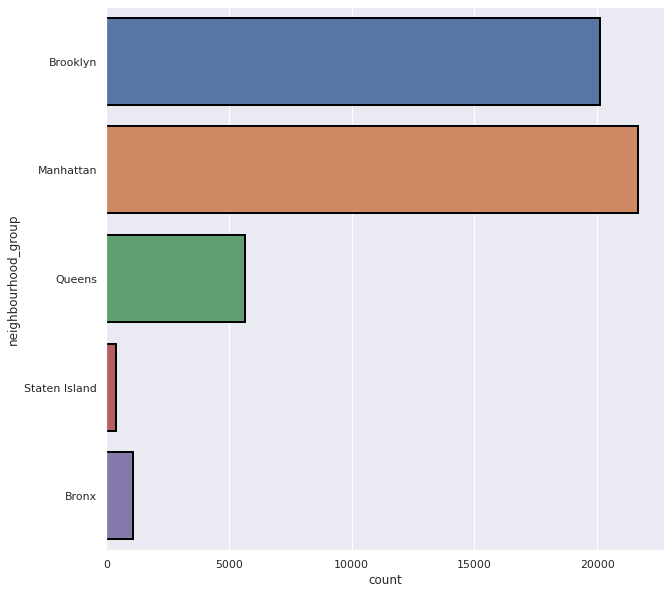

In [21]:
#Seems like Manhattan and Brooklyn are most popular areas for Airbnb listings
sns.set(style="darkgrid")
plt.figure(figsize=(10,10))
ax = sns.countplot(y = df_bookings["neighbourhood_group"],
                   edgecolor=(0,0,0),
                   linewidth=2)

In [22]:
df_bookings.pivot_table(values=['price','availability_365','minimum_nights'],index='neighbourhood_group',aggfunc=[np.min,np.mean, np.max])

amin                                  mean  \
                    availability_365 minimum_nights price availability_365   
neighbourhood_group                                                          
Bronx                              0              1     0       165.758937   
Brooklyn                           0              1     0       100.232292   
Manhattan                          0              1     0       111.979410   
Queens                             0              1    10       144.451818   
Staten Island                      0              1    13       199.678284   

                                                           amax  \
                    minimum_nights       price availability_365   
neighbourhood_group                                               
Bronx                     4.560953   87.496792              365   
Brooklyn                  6.056556  124.383207              365   
Manhattan                 8.579151  196.875814              365   
Queens                    5.181433   99.517649              365   
Staten Island             4.831099  114.812332              365   

                                           
                    minimum_nights  price  
neighbourhood_group                        
Bronx                          365   2500  
Brooklyn                       999  10000  
Manhattan                     1250  10000  
Queens                         500  10000  
Staten Island                  365   5000

In [23]:
df_Manhattan = df_bookings[df_bookings['neighbourhood_group'] == 'Manhattan'].sort_values(by='price', ascending=False)
df_Manhattan.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83
40433,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,NaN,NaN,1,365
6530,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,2015-01-02,0.02,1,0
30268,23377410,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,18128455,Rum,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,2,2018-09-18,0.18,1,251


{'boxes': [<matplotlib.lines.Line2D at 0x7f5379d87208>],
 'caps': [<matplotlib.lines.Line2D at 0x7f5379dba438>,
 'fliers': [],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f5379dc58d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f5379d8d4a8>,
  <matplotlib.lines.Line2D at 0x7f5379d8d278>]}

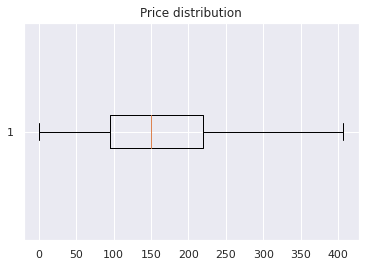

In [24]:
fig1, ax1 = plt.subplots()
ax1.set_title('Price distribution')
ax1.boxplot(df_Manhattan['price'],vert=False,  showfliers=False)     #Lots of outlier prices! I.e. highly skewed to the right

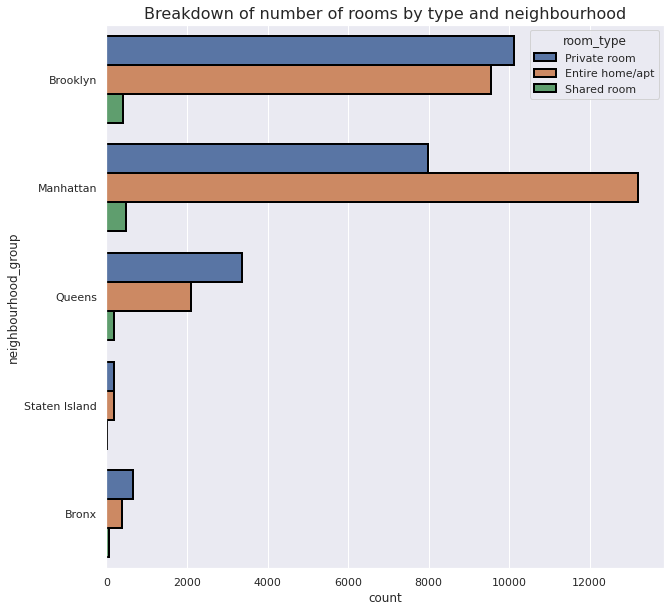

In [41]:
plt.figure(figsize=(10,10))
plt.title('Breakdown of number of rooms by type and neighbourhood', fontsize=16) #'Breakdown of number of rooms by type and neighbourhood')
ax = sns.countplot(y = df_bookings['neighbourhood_group'],
                   hue = df_bookings['room_type'],
                   edgecolor=(0,0,0),
                   linewidth=2)
#ax.set_title('Breakdown of number of rooms by type and neighbourhood')


## Available days visualisation (map)

Saving figure availability_365_plot


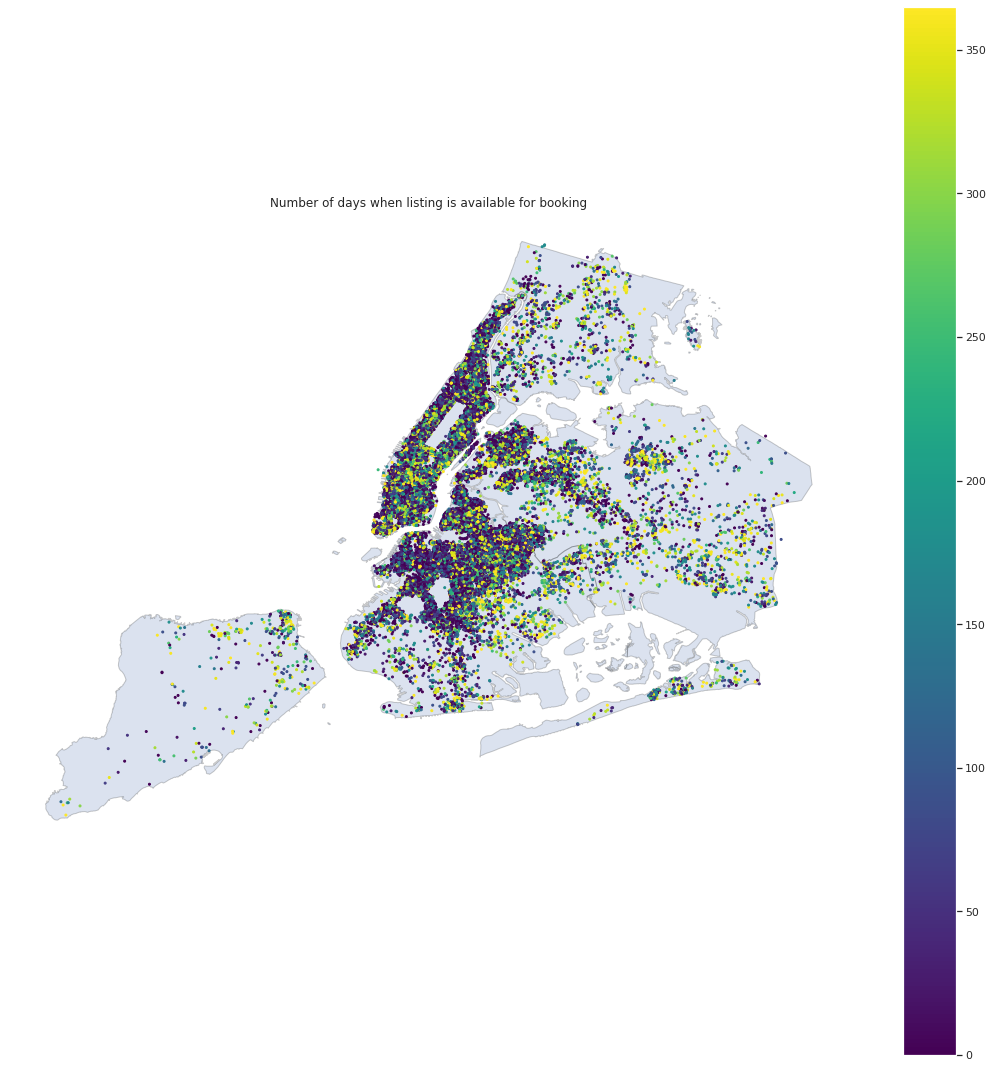

In [ ]:
crs = CRS("ESRI:54009")
df_exploring = df_bookings
geometry = geopandas.points_from_xy(df_exploring.longitude, df_exploring.latitude)
geo_data = geopandas.GeoDataFrame(df_exploring,crs=crs,geometry=geometry)
nyc = geopandas.read_file(geopandas.datasets.get_path('nybb'))
nyc = nyc.to_crs(epsg=4326)

fig,ax = plt.subplots(figsize=(15,15))
nyc.plot(ax=ax,alpha=0.2,edgecolor='black')
geo_data.plot(column='availability_365',ax=ax,legend=True,cmap='viridis',markersize=4)

plt.title("Number of days when listing is available for booking")
plt.axis('off')
save_fig("availability_365_plot")

In [ ]:
list_of_20_price = df_bookings.groupby(by=['neighbourhood_group','neighbourhood'],as_index=False)['price','availability_365'].mean().sort_values(by='price', ascending=False).head(20)
list_of_20_price

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,neighbourhood_group,neighbourhood,price,availability_365
188,Staten Island,Fort Wadsworth,800.000000,365.000000
220,Staten Island,Woodrow,700.000000,0.000000
121,Manhattan,Tribeca,490.638418,126.508475
88,Brooklyn,Sea Gate,487.857143,65.571429
34,Bronx,Riverdale,442.090909,160.818182
204,Staten Island,Prince's Bay,409.500000,110.500000
95,Manhattan,Battery Park City,367.557143,100.328571
102,Manhattan,Flatiron District,341.925000,123.050000
205,Staten Island,Randall Manor,336.000000,275.210526
115,Manhattan,NoHo,295.717949,101.820513


In [ ]:
# What are the top 20 neighbourhoods i.t.o. most listings?
list_of_20 = df_bookings["neighbourhood"].value_counts().head(20)
list_of_20
#mean_price = pd.DataFrame(df_bookings.groupby('neighbourhood')['price'].mean())
#mean_price
#print(mean_price['neighbourhood'] == 'Williamsburg')#mean_price.sort_values(by='price',ascending=False)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
East Harlem           1117
Greenpoint            1115
Chelsea               1113
Lower East Side        911
Astoria                900
Washington Heights     899
West Village           768
Financial District     744
Flatbush               621
Clinton Hill           572
Name: neighbourhood, dtype: int64

In [ ]:
list_of_20 = list(df_bookings["neighbourhood"].value_counts().head(20).index)
list_of_20

['Williamsburg',
 'Bedford-Stuyvesant',
 'Harlem',
 'Bushwick',
 'Upper West Side',
 "Hell's Kitchen",
 'East Village',
 'Upper East Side',
 'Crown Heights',
 'Midtown',
 'East Harlem',
 'Greenpoint',
 'Chelsea',
 'Lower East Side',
 'Astoria',
 'Washington Heights',
 'West Village',
 'Financial District',
 'Flatbush',
 'Clinton Hill']

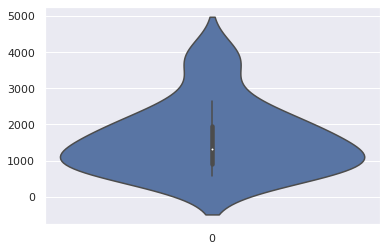

In [ ]:
f, ax = plt.subplots()
sns.violinplot(data=df_bookings["neighbourhood"].value_counts().head(20))

Saving figure scatter_matrix_plot


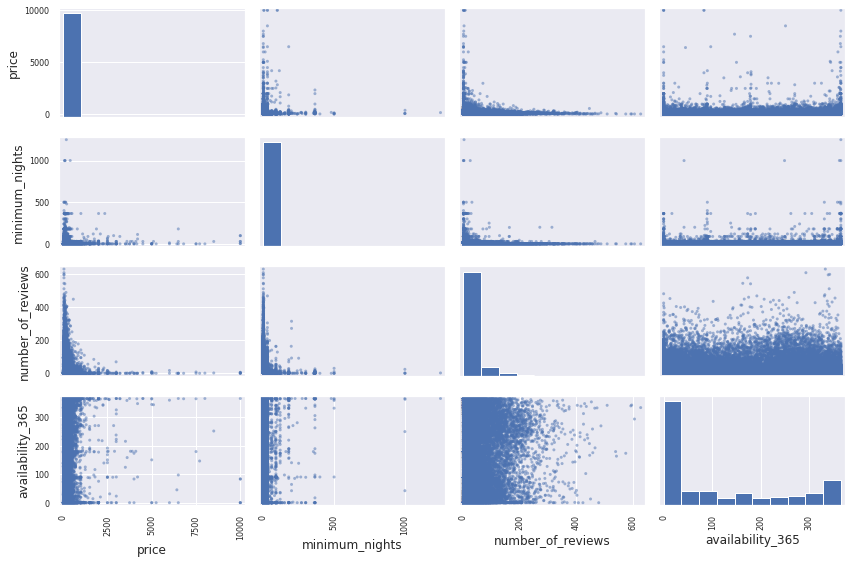

In [ ]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.plotting import scatter_matrix

attributes = ["price", "minimum_nights","number_of_reviews","availability_365"]

scatter_matrix(df_bookings[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Saving figure availability_vs_price_scatterplot


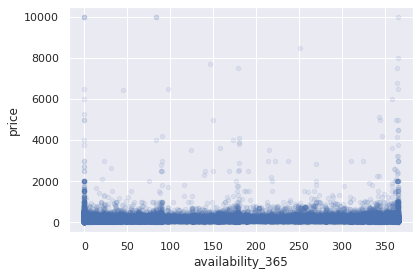

In [ ]:
df_bookings.plot(kind="scatter", x="availability_365", y="price", alpha=0.1)
save_fig("availability_vs_price_scatterplot")

#Explore the most popular places

In [ ]:
df_popular = df_bookings[df_bookings['availability_365']<5] 
df_popular.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
14,6090,West Village Nest - Superhost,11975,Alina,Manhattan,West Village,40.73530,-74.00525,Entire home/apt,120,90,27,2018-10-31,0.22,1,0
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28,0.07,1,0


# Scrub data (preprocessing for modeling)

In [ ]:
#customer id col
Id_col = ['id']

#Target columns
target_col = ["price"]

#categorical columns
cat_cols = ['neighbourhood_group', 'room_type'] 

#numerical columns
num_cols = ['minimum_nights', 'number_of_reviews','availability_365']

#other columns
other_cols = ['latitude', 'longitude']

#Columns more than 2 values
all_cols = [x for x in df_bookings.columns if x in num_cols + cat_cols + target_col + Id_col+ other_cols]

#Columns I dont want to incvestigate for now
drop_cols = [x for x in df_bookings.columns if x not in all_cols]

#Duplicating columns for multi value columns
df_bookings_2 = df_bookings.drop(drop_cols,axis=1)
df_bookings_2 = pd.get_dummies(data = df_bookings_2, columns = cat_cols)
df_bookings_2.head()


,id,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2539,40.64749,-73.97237,149,1,9,365,0,1,0,0,0,0,1,0
1,2595,40.75362,-73.98377,225,1,45,355,0,0,1,0,0,1,0,0
2,3647,40.80902,-73.94190,150,3,0,365,0,0,1,0,0,0,1,0
3,3831,40.68514,-73.95976,89,1,270,194,0,1,0,0,0,1,0,0
4,5022,40.79851,-73.94399,80,10,9,0,0,0,1,0,0,1,0,0


In [ ]:
#Scaling Numerical columns
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

# Scale data
scaled = std.fit_transform(df_bookings_2[num_cols+other_cols])
df_bookings_scaled = pd.DataFrame(scaled,columns=num_cols+other_cols)

#dropping original values merging scaled values for numerical columns
df_bookings_2 = df_bookings_2.drop(columns = num_cols+other_cols,axis = 1)
df_bookings_2 = df_bookings_2.merge(df_bookings_scaled, left_index=True, right_index=True, how = "left")

df_bookings_2.head()

,id,price,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,minimum_nights,number_of_reviews,availability_365,latitude,longitude
0,2539,149,0,1,0,0,0,0,1,0,-0.293996,-0.320414,1.916250,-1.493849,-0.437652
1,2595,225,0,0,1,0,0,1,0,0,-0.293996,0.487665,1.840275,0.452436,-0.684639
2,3647,150,0,0,1,0,0,0,1,0,-0.196484,-0.522433,1.916250,1.468399,0.222497
3,3831,89,0,1,0,0,0,1,0,0,-0.293996,5.538156,0.617065,-0.803398,-0.164450
4,5022,80,0,0,1,0,0,1,0,0,0.144807,-0.320414,-0.856865,1.275660,0.177216


In [ ]:
df_bookings_2.drop(['id'], axis=1, inplace=True)
df_bookings_2.head()

,price,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,minimum_nights,number_of_reviews,availability_365,latitude,longitude
0,149,0,1,0,0,0,0,1,0,-0.293996,-0.320414,1.916250,-1.493849,-0.437652
1,225,0,0,1,0,0,1,0,0,-0.293996,0.487665,1.840275,0.452436,-0.684639
2,150,0,0,1,0,0,0,1,0,-0.196484,-0.522433,1.916250,1.468399,0.222497
3,89,0,1,0,0,0,1,0,0,-0.293996,5.538156,0.617065,-0.803398,-0.164450
4,80,0,0,1,0,0,1,0,0,0.144807,-0.320414,-0.856865,1.275660,0.177216


In [ ]:
#Check for NULLS
df_bookings_2[df_bookings_2.isnull().any(axis=1)]

,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,minimum_nights,number_of_reviews,availability_365


In [ ]:
df_bookings_2.head()

,price,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,minimum_nights,number_of_reviews,availability_365
0,149,0,1,0,0,0,0,1,0,-0.293996,-0.320414,1.916250
1,225,0,0,1,0,0,1,0,0,-0.293996,0.487665,1.840275
2,150,0,0,1,0,0,0,1,0,-0.196484,-0.522433,1.916250
3,89,0,1,0,0,0,1,0,0,-0.293996,5.538156,0.617065
4,80,0,0,1,0,0,1,0,0,0.144807,-0.320414,-0.856865


#Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df_bookings_2.drop(['price'], axis = 1)
y = df_bookings_2.price

In [ ]:
# Split it to a 70:30 Ratio Train:Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [ ]:
# Normalize the data
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train

array([[-1.49883945e-01,  1.19898944e+00, -8.94927093e-01, ...,
        -3.36921183e-03, -5.22394345e-01, -8.57632163e-01],
       [-1.49883945e-01, -8.34035704e-01,  1.11740946e+00, ...,
        -1.92409612e-01, -4.33746078e-01, -8.57632163e-01],
       [-1.49883945e-01,  1.19898944e+00, -8.94927093e-01, ...,
        -2.86929812e-01,  9.49525345e-03,  5.32153726e-01],
       ...,
       [-1.49883945e-01, -8.34035704e-01,  1.11740946e+00, ...,
        -2.39669712e-01, -2.12125412e-01, -5.91826119e-01],
       [-1.49883945e-01,  1.19898944e+00, -8.94927093e-01, ...,
        -1.92409612e-01, -4.33746078e-01,  1.00301015e+00],
       [-1.49883945e-01, -8.34035704e-01,  1.11740946e+00, ...,
        -1.92409612e-01,  3.93218104e+00,  1.08654919e+00]])

In [ ]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.149884,1.198989,-0.894927,-0.361718,-0.086125,0.960067,-0.915441,-0.15579,-0.003369,-0.522394,-0.857632
1,-0.149884,-0.834036,1.117409,-0.361718,-0.086125,-1.041594,1.092370,-0.15579,-0.192410,-0.433746,-0.857632
2,-0.149884,1.198989,-0.894927,-0.361718,-0.086125,0.960067,-0.915441,-0.15579,-0.286930,0.009495,0.532154
3,-0.149884,1.198989,-0.894927,-0.361718,-0.086125,-1.041594,1.092370,-0.15579,-0.239670,-0.500232,1.473867
4,-0.149884,1.198989,-0.894927,-0.361718,-0.086125,0.960067,-0.915441,-0.15579,-0.145150,-0.455908,-0.857632


In [ ]:
pd.DataFrame(y_train).head()

,price
20938,55
4459,40
27216,196
42398,60
12582,220


In [ ]:
lr = LinearRegression().fit(X_train, y_train)

y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print(lr.score(X_test, y_test))

0.10712087510145629


In [ ]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
results

,Actual,Predicted
43813,225,232.888833
32734,649,237.057671
25276,300,177.074286
36084,26,83.461576
17736,125,171.841029
...,...,...
48122,69,80.384167
42652,220,225.521659
22776,199,125.931150
43308,150,225.893628


In [ ]:
from sklearn.linear_model import LinearRegression  # Import Linear Regression model

multiple_linear_reg = LinearRegression(fit_intercept=False)  # Create a instance for Linear Regression model
multiple_linear_reg.fit(X_train, y_train)  # Fit data to the model

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

### Evaluating Multiple Linear Regression Model

In [ ]:
from sklearn.model_selection import cross_val_predict  # For K-Fold Cross Validation
from sklearn.metrics import r2_score  # For find accuracy with R2 Score
from sklearn.metrics import mean_squared_error  # For MSE
from math import sqrt  # For squareroot operation

In [ ]:
# Prediction with training dataset:
y_pred_MLR_train = multiple_linear_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_MLR_test = multiple_linear_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_MLR_train = r2_score(y_train, y_pred_MLR_train)
print("Training Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_train)

# Find testing accuracy for this model:
accuracy_MLR_test = r2_score(y_test, y_pred_MLR_test)
print("Testing Accuracy for Multiple Linear Regression Model: ", accuracy_MLR_test)

# Find RMSE for training data:
RMSE_MLR_train = sqrt(mean_squared_error(y_train, y_pred_MLR_train))
print("RMSE for Training Data: ", RMSE_MLR_train)

# Find RMSE for testing data:
RMSE_MLR_test = sqrt(mean_squared_error(y_test, y_pred_MLR_test))
print("RMSE for Testing Data: ", RMSE_MLR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_MLR = cross_val_predict(multiple_linear_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_MLR = r2_score(y, y_pred_cv_MLR)
print("Accuracy for 10-Fold Cross Predicted Multiple Linear Regression Model: ", accuracy_cv_MLR)

ValueError: ignored

In [ ]:
from sklearn.tree import DecisionTreeRegressor  # Import Decision Tree Regression model

decision_tree_reg = DecisionTreeRegressor(max_depth=5, random_state=13)  # Create an instance for Decision Tree Regression model
decision_tree_reg.fit(X_train, y_train)  # Fit data to the model

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=13, splitter='best')

###  Evaluating Decision Tree Regression Model

In [ ]:
# Prediction with training dataset:
y_pred_DTR_train = decision_tree_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_DTR_test = decision_tree_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_DTR_train = r2_score(y_train, y_pred_DTR_train)
print("Training Accuracy for Decision Tree Regression Model: ", accuracy_DTR_train)

# Find testing accuracy for this model:
accuracy_DTR_test = r2_score(y_test, y_pred_DTR_test)
print("Testing Accuracy for Decision Tree Regression Model: ", accuracy_DTR_test)

# Find RMSE for training data:
RMSE_DTR_train = sqrt(mean_squared_error(y_train, y_pred_DTR_train))
print("RMSE for Training Data: ", RMSE_DTR_train)

# Find RMSE for testing data:
RMSE_DTR_test = sqrt(mean_squared_error(y_test, y_pred_DTR_test))
print("RMSE for Testing Data: ", RMSE_DTR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_DTR = cross_val_predict(decision_tree_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_DTR = r2_score(y, y_pred_cv_DTR)
print("Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model: ", accuracy_cv_DTR)

Training Accuracy for Decision Tree Regression Model:  0.21157557468682453
Testing Accuracy for Decision Tree Regression Model:  0.010411337033316426
RMSE for Training Data:  216.81017355932454
RMSE for Testing Data:  229.29009499434184
Accuracy for 10-Fold Cross Predicted Decision Tree Regression Model:  0.013451509670237338


In [ ]:
from sklearn.ensemble import RandomForestRegressor  # Import Random Forest Regression model

random_forest_reg = RandomForestRegressor(n_estimators=400, max_depth=5, random_state=13)  # Create a instance for Random Forest Regression model
random_forest_reg.fit(X_train, y_train)  # Fit data to the model

In [ ]:
# Prediction with training dataset:
y_pred_RFR_train = random_forest_reg.predict(X_train)

# Prediction with testing dataset:
y_pred_RFR_test = random_forest_reg.predict(X_test)

# Find training accuracy for this model:
accuracy_RFR_train = r2_score(y_train, y_pred_RFR_train)
print("Training Accuracy for Random Forest Regression Model: ", accuracy_RFR_train)

# Find testing accuracy for this model:
accuracy_RFR_test = r2_score(y_test, y_pred_RFR_test)
print("Testing Accuracy for Random Forest Regression Model: ", accuracy_RFR_test)

# Find RMSE for training data:
RMSE_RFR_train = sqrt(mean_squared_error(y_train, y_pred_RFR_train))
print("RMSE for Training Data: ", RMSE_RFR_train)

# Find RMSE for testing data:
RMSE_RFR_test = sqrt(mean_squared_error(y_test, y_pred_RFR_test))
print("RMSE for Testing Data: ", RMSE_RFR_test)

# Prediction with 10-Fold Cross Validation:
y_pred_cv_RFR = cross_val_predict(random_forest_reg, X, y, cv=10)

# Find accuracy after 10-Fold Cross Validation
accuracy_cv_RFR = r2_score(y, y_pred_cv_RFR)
print("Accuracy for 10-Fold Cross Predicted Random Forest Regression Model: ", accuracy_cv_RFR)

Training Accuracy for Random Forest Regression Model:  0.2179465298394283
Testing Accuracy for Random Forest Regression Model:  0.1024017148486771
RMSE for Training Data:  215.9324168627727
RMSE for Testing Data:  218.37300264026018
Accuracy for 10-Fold Cross Predicted Random Forest Regression Model:  0.08839694955135657
